In [9]:
import numpy as np
import sys
sys.path.append('../')
file = '../publication_database.csv'
images = '../publication_images'
import pandas as pd
import matplotlib.pyplot as plt
from pyrrhenious import database
from pyrrhenious import utils as pyrutils
import checking_author as check_auth

ecdatabase = database.Database(file)
phases = ecdatabase.get_phases()
model_names = ecdatabase.get_model_list_for_phase('basaltic melt')
model_names

['pom_10b_basalt',
 'nih_11_basalt_hydrous',
 'sifre_14_carb_h_basalt',
 'dai_15_basalt']

# Exploring Pyrrhenious's Melt Models Database Correspondence

Here we look at a basaltic melt's parameterization correspondence of:

 * Pommier A. et al., 2010. Time-dependent changes of the electrical conductivity of basaltic melts with redox state
 
 * Ni H. et al., 2011. Electrical conductivity of hydrous basaltic melts: implications for partial melting in the upper mantle
 
 * Sifré D. et al., 2014. The electrical conductivity during incipient melting in the oceanic low-velocity zone

  
 * Dai et al., 2015. Electrical conductivity of hydrous natural basalts at high temperatures and pressures

## Pommier A. et al., 2010

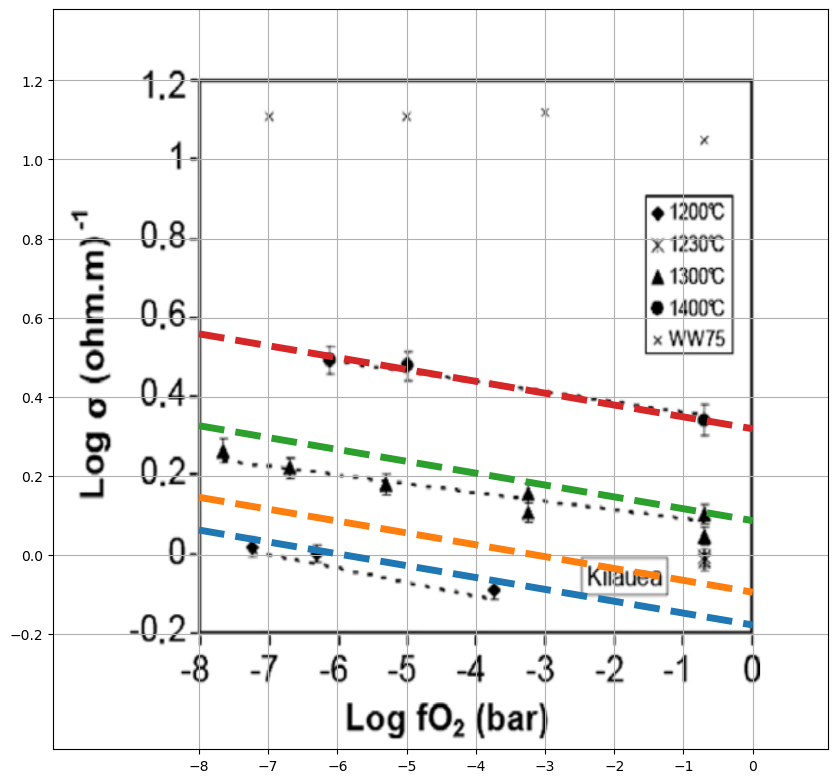

In [10]:
index = 0
model = model_names[index]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
logfo2 = np.linspace(-8,0,num=100)

model = ecdatabase.get_model(model)
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for temp in [1473,1503,1573,1673]:
        conductivity4 = model.get_conductivity(T=temp,logfo2=logfo2)
        ax.plot(logfo2,np.log10(conductivity4),linestyle='--',linewidth=5)
        


## Ni H. et al., 2011

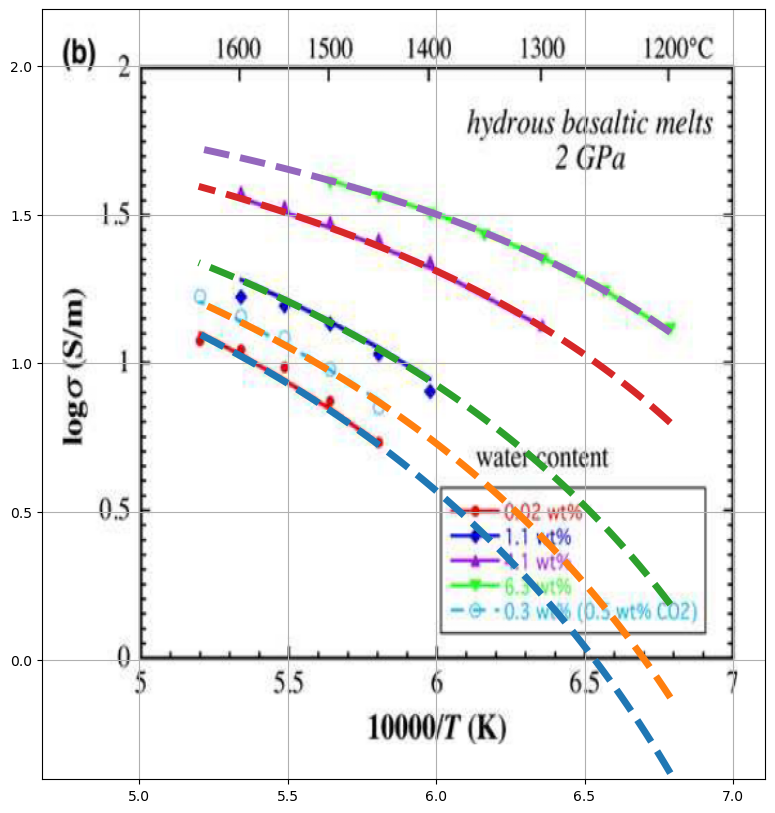

In [11]:
index = 1
model = model_names[index]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
logfo2 = np.linspace(-8,0,num=100)

model = ecdatabase.get_model(model)
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for water in [0.02,0.3,1.1,4.1,6.3]:
        c = model.get_conductivity(T=temperature_range,Cw= water*1e4)
        ax.plot(1e4/temperature_range,np.log10(c),linestyle='--',linewidth=5)


## Sifre et al., 2014. 

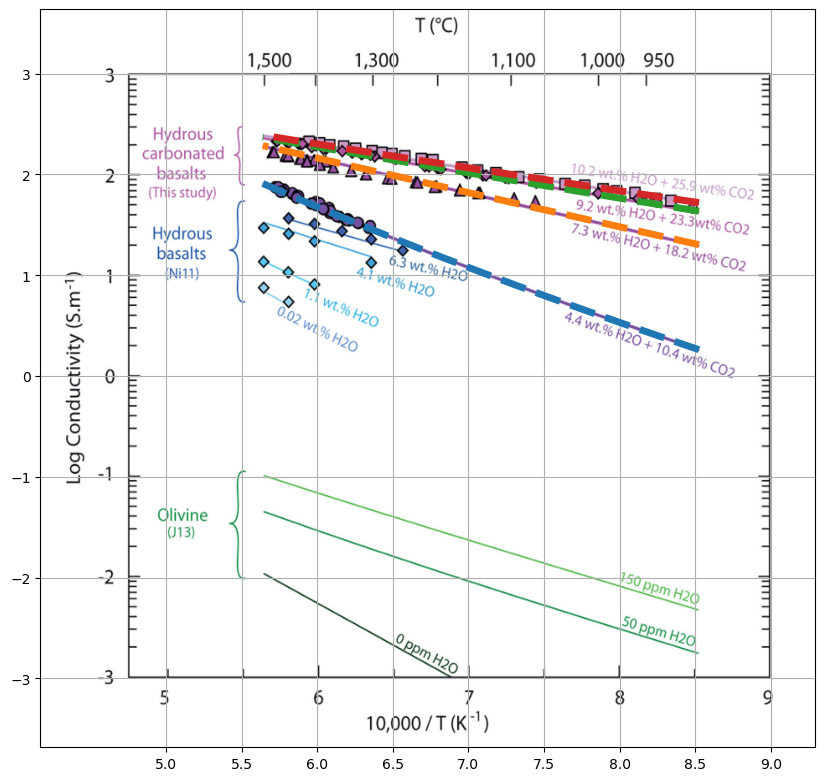

In [12]:
index = 2
model = model_names[index]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
logfo2 = np.linspace(-8,0,num=100)

model = ecdatabase.get_model(model)
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for water, co2 in zip([4.4,7.3,9.2,10.2],[10.4,18.2,23.3,25.9]):
        c = model.get_conductivity(T=temperature_range, Cw= water*1e4,co2=co2)
        ax.plot(1e4/temperature_range,np.log10(c),linestyle='--',linewidth=5)


## Dai et al., 2015. 

original equation doesn't include a volume term. Adjusting the alpha to 0.3, and fiddling with the preexponentail constants gets something pretty close to the publication graph that includes pressure.

dai_15_basalt:{45.0(5.0) Cw^0.0(nan) exp( -(1.14(0.07) + -0.3(0.09)Cw^0.2(0.09) + P1.43(0.15))/kT)+30.0(5.0) Cw^1.65(0.03) exp( -(1.14(0.07) + -0.3(0.09)Cw^0.2(0.09) + P1.43(0.15))/kT)}


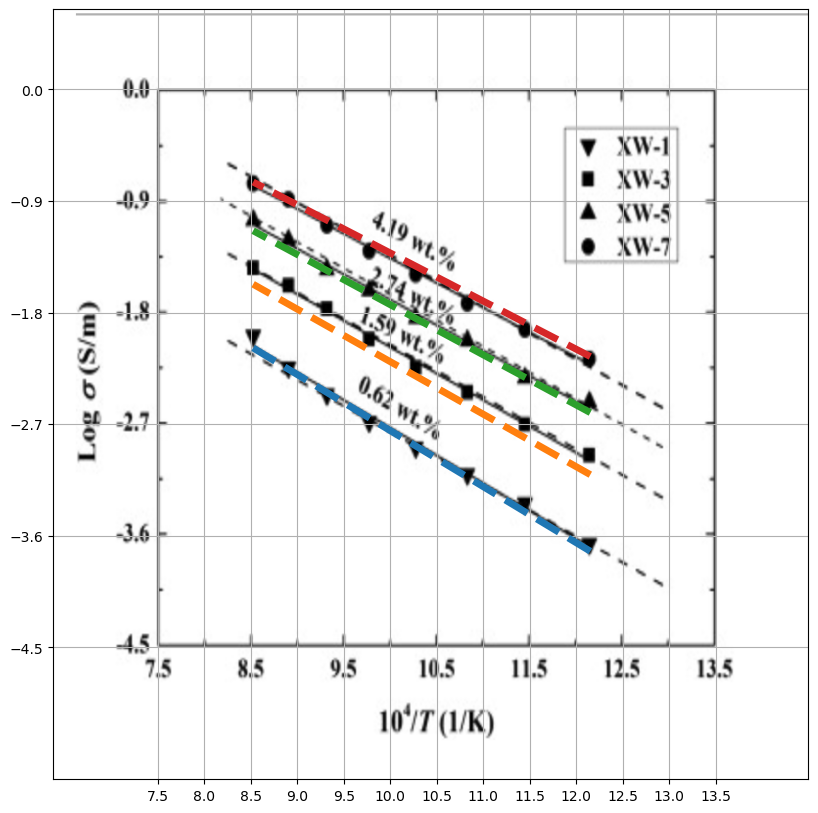

In [13]:
index = 3
model = model_names[index]
ec_model_row = ecdatabase.get_model_properties(model)
pngs, extents, aspects, xticks, yticks = check_auth.get_fig_data(ec_model_row, images)
temperature_range = np.linspace(ec_model_row['temp_min'],ec_model_row['temp_max'],num=100,dtype=float).ravel()
logfo2 = np.linspace(-8,0,num=100)

model = ecdatabase.get_model(model)
print(model)
for png, ext, asp, xt, yt in zip(pngs,extents,aspects,xticks,yticks):
    fig, ax = check_auth.prep_fig(png, ext,xt,yt,asp)
    for water in np.asarray([0.62,1.59,2.74,4.19]):
        c = model.get_conductivity(T=temperature_range, Cw= water*1e4,P=2)
        ax.plot(1e4/temperature_range,np.log10(c),linestyle='--',linewidth=5)

